In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [2]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn1 = root_path + 'models/samps/nn1_val_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn1_val_samps/


In [3]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.010845106482991775 0.02527064574022783
external_shear_g2 0.010623242345939806 0.02872416405360296
lens_mass_center_x 0.009236728253967444 0.03072933882391267
lens_mass_center_y 0.00837932370266492 0.030453106725748833
lens_mass_e1 0.01994412578214206 0.04113806534415551
lens_mass_e2 0.018971950298357278 0.04927610485951972
lens_mass_gamma 0.04267109786733081 0.07509669442321512
lens_mass_theta_E_log 0.008313571909095582 0.02918095220432657


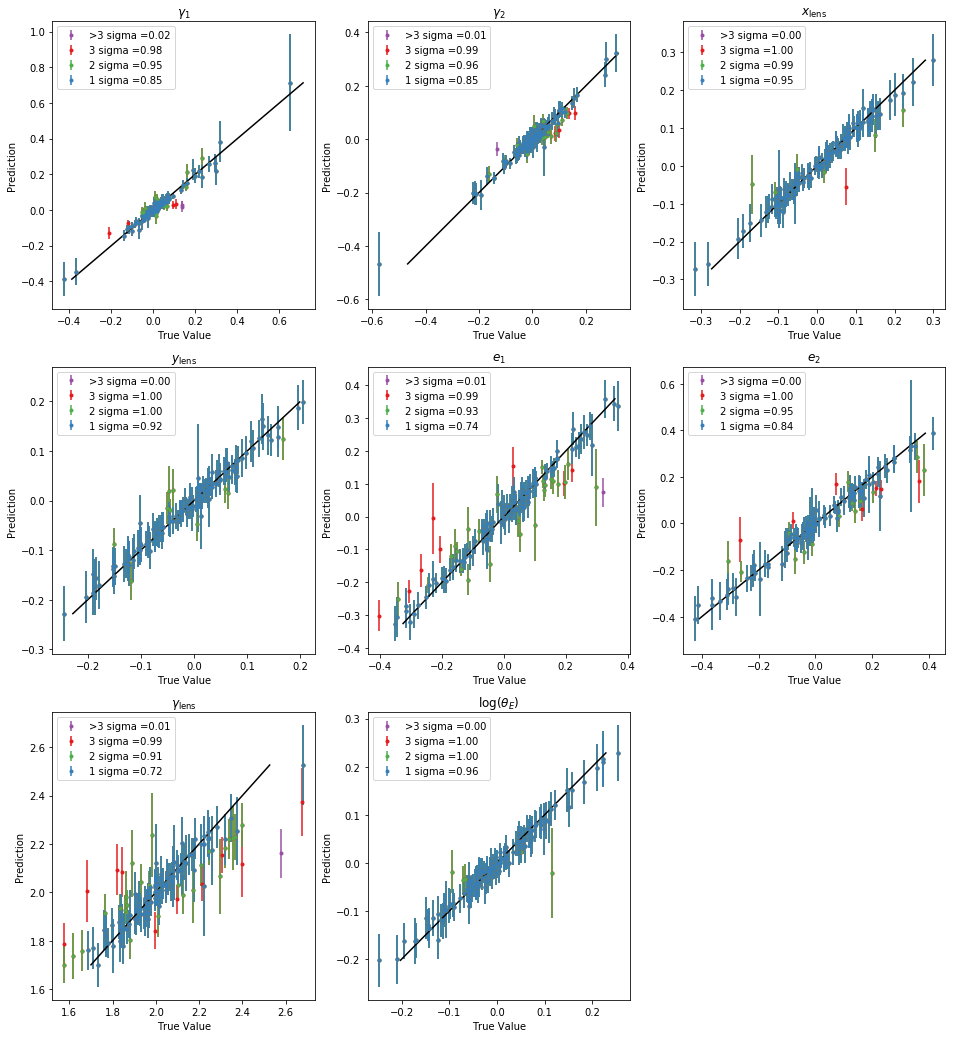

In [4]:
bnn_infer.gen_coverage_plots()

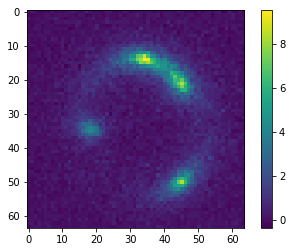

external_shear_g1 0.020646855
external_shear_g2 0.014081789
lens_mass_center_x -0.055423453
lens_mass_center_y 0.0297536
lens_mass_e1 0.2794923
lens_mass_e2 -0.21088414
lens_mass_gamma 1.952081
lens_mass_theta_E_log -0.05155672


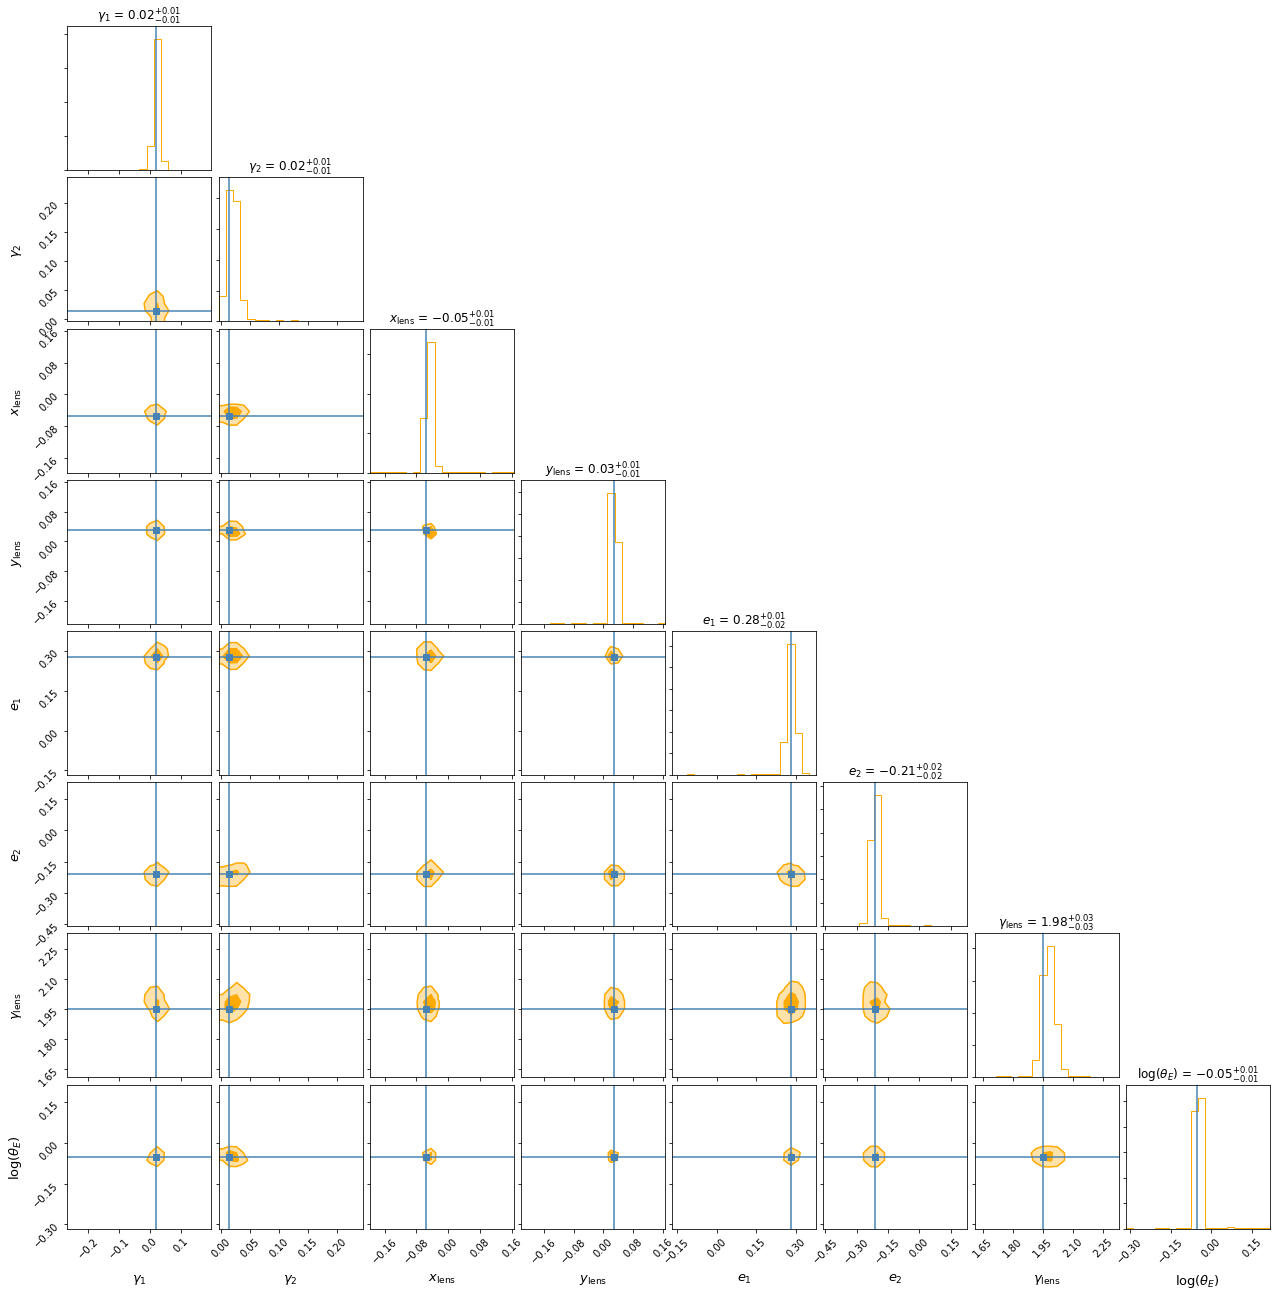

In [5]:
image_index = 40
bnn_infer.plot_posterior_contours(image_index)

9.390235916556897e-05 0.0073036070856737885


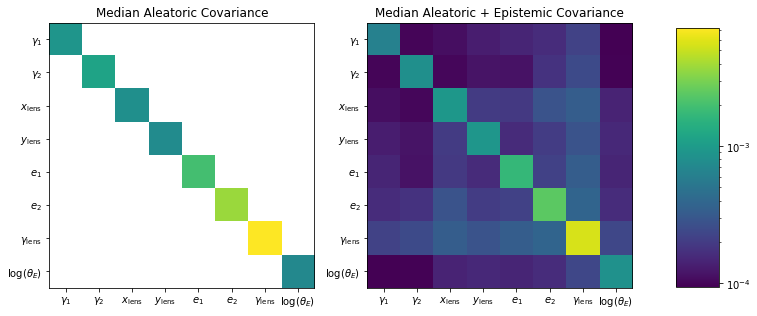

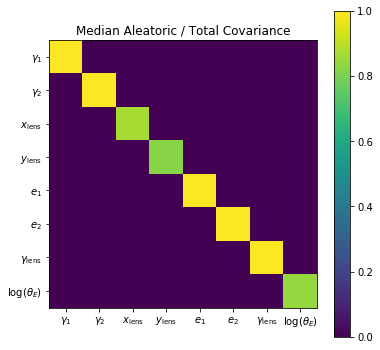

In [6]:
bnn_infer.comp_al_ep_unc()

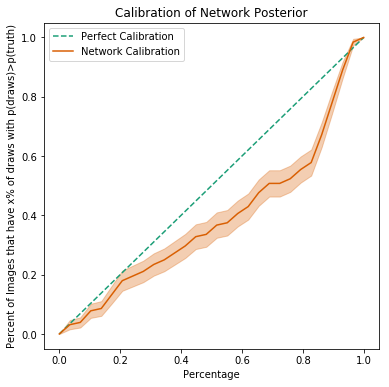

In [7]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Full Posterior

In [8]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn2 = root_path + 'models/samps/nn2_val_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn2_val_samps/


In [9]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.008045658828635668 0.032261551928292234
external_shear_g2 0.009717100192942483 0.03686309563456246
lens_mass_center_x 0.008140158339141307 0.034720279788170494
lens_mass_center_y 0.009634451650814144 0.03437521720593824
lens_mass_e1 0.023994129825266983 0.06025872488185678
lens_mass_e2 0.02148232808323758 0.05738092048097149
lens_mass_gamma 0.05034919902446611 0.11111752960939632
lens_mass_theta_E_log 0.007819458801317517 0.03154376548480456


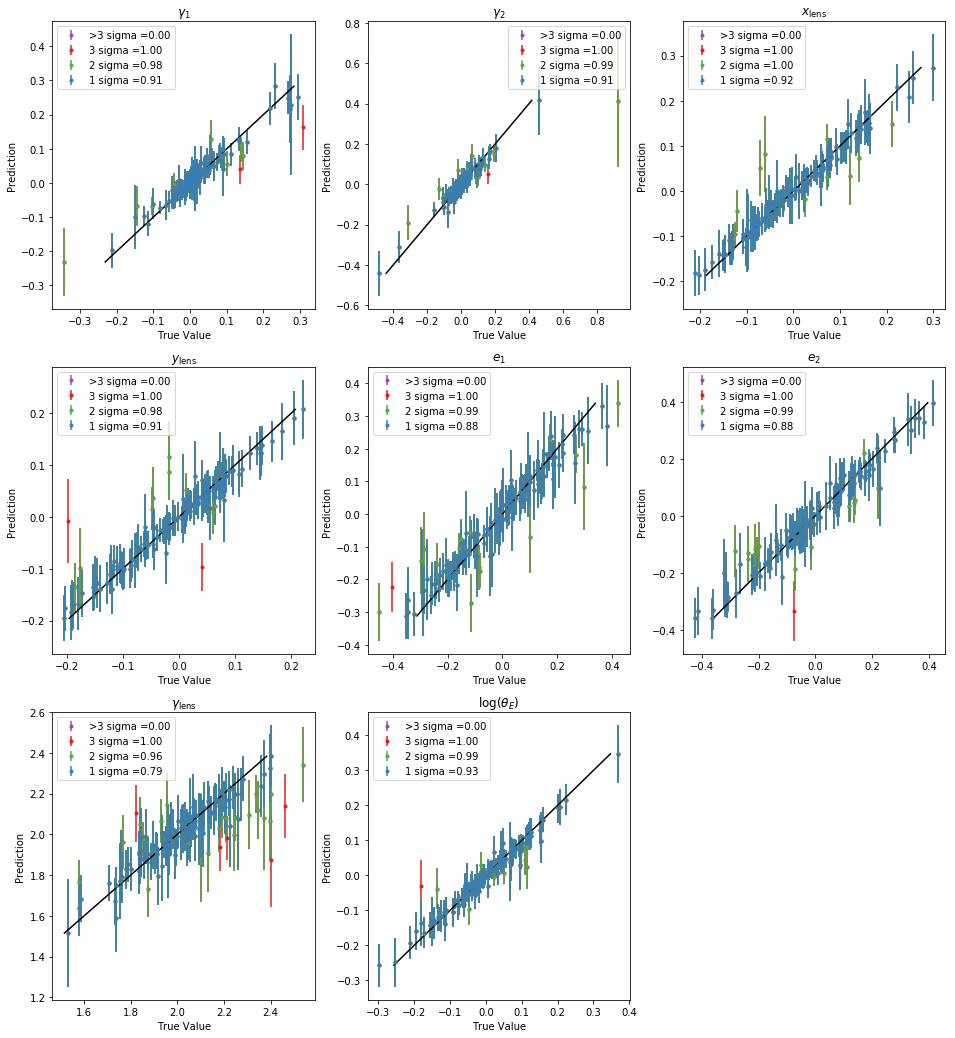

In [10]:
bnn_infer.gen_coverage_plots()

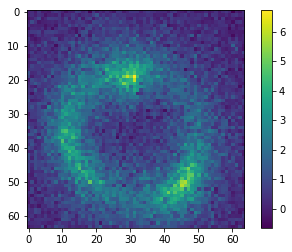

external_shear_g1 -0.045030303
external_shear_g2 -0.022861773
lens_mass_center_x -0.10721671
lens_mass_center_y 0.07789007
lens_mass_e1 -0.18748711
lens_mass_e2 -0.16802895
lens_mass_gamma 1.9436865
lens_mass_theta_E_log -0.01420691


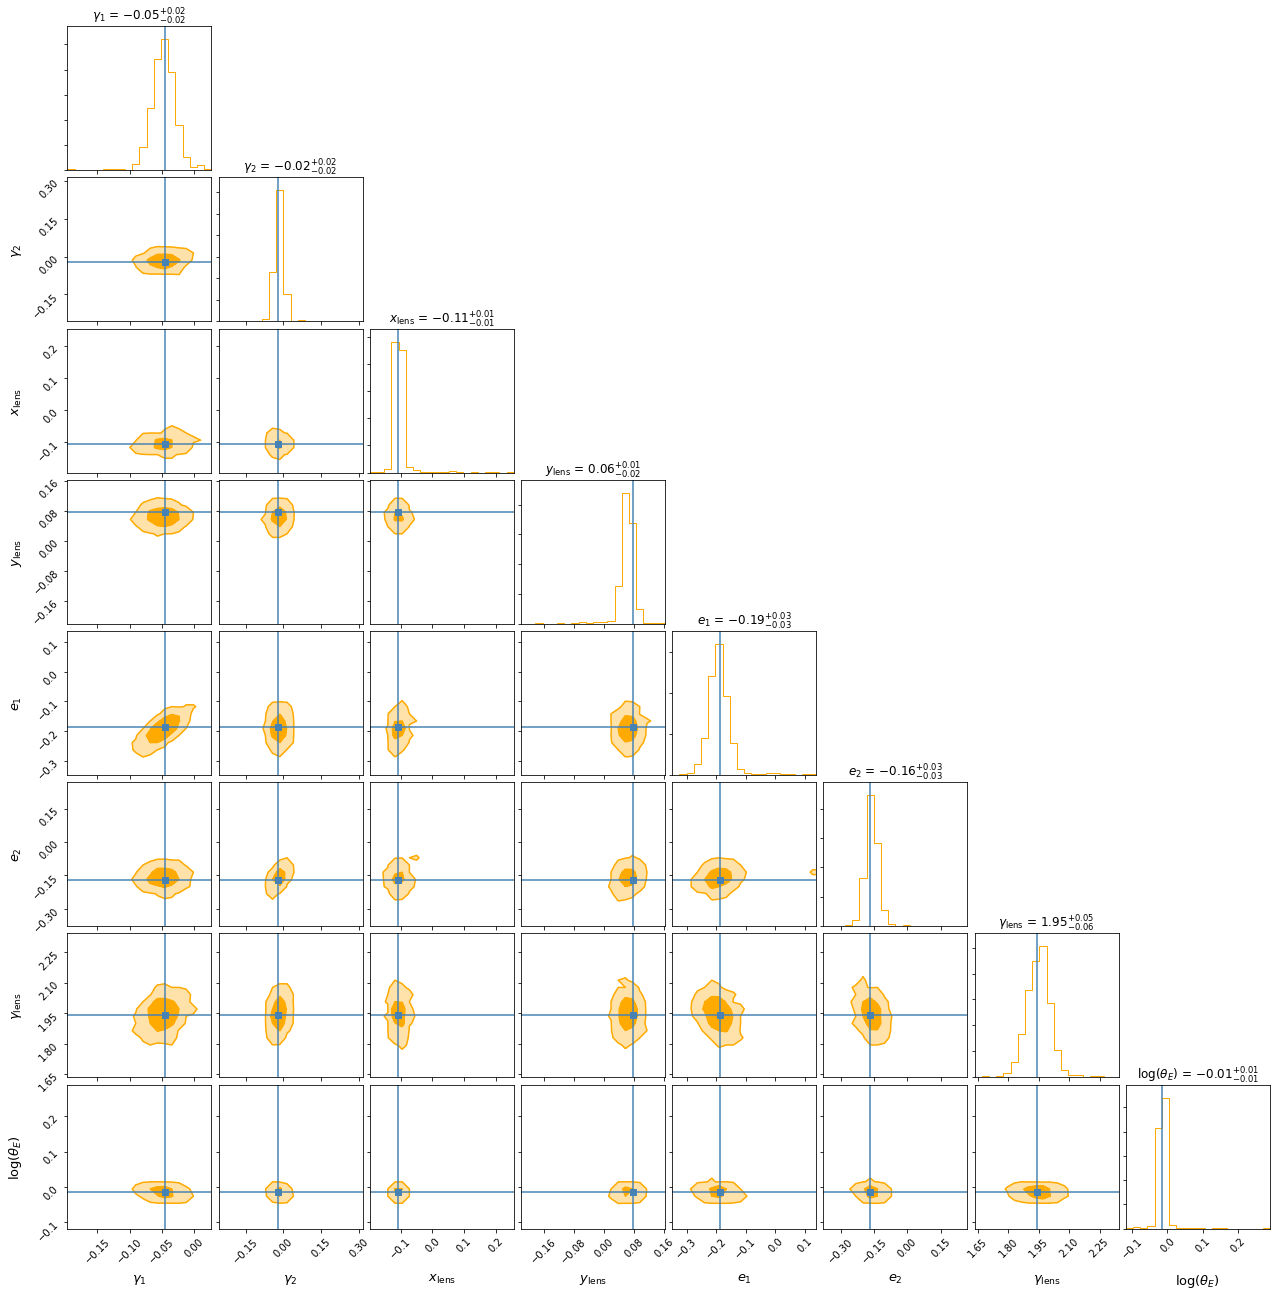

In [11]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

2.212040817745268e-05 0.01236046163411254


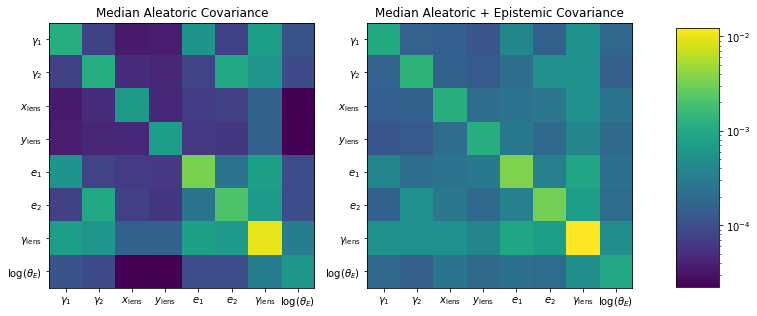

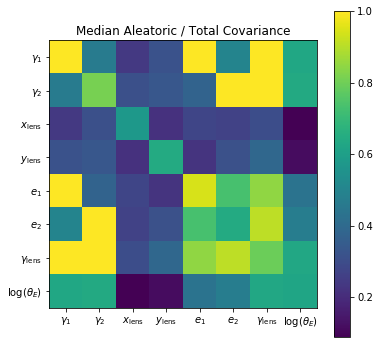

In [12]:
bnn_infer.comp_al_ep_unc()

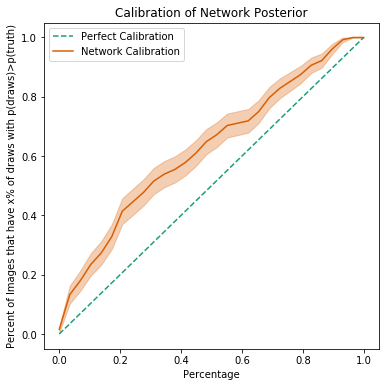

In [13]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## GM Posterior

In [14]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn3.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn3 = root_path + 'models/samps/nn3_val_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn3_val_samps/


In [15]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.009044605004946388 0.030224341351429602
external_shear_g2 0.009519934445351447 0.03344131405316089
lens_mass_center_x 0.009402618325267474 0.03407759721871831
lens_mass_center_y 0.009007546500351557 0.033800940841016744
lens_mass_e1 0.020673786348778533 0.054937894974583984
lens_mass_e2 0.02027751195786856 0.061566372548633494
lens_mass_gamma 0.05537196537127409 0.10103955542764537
lens_mass_theta_E_log 0.006788087956957317 0.029428707031121777


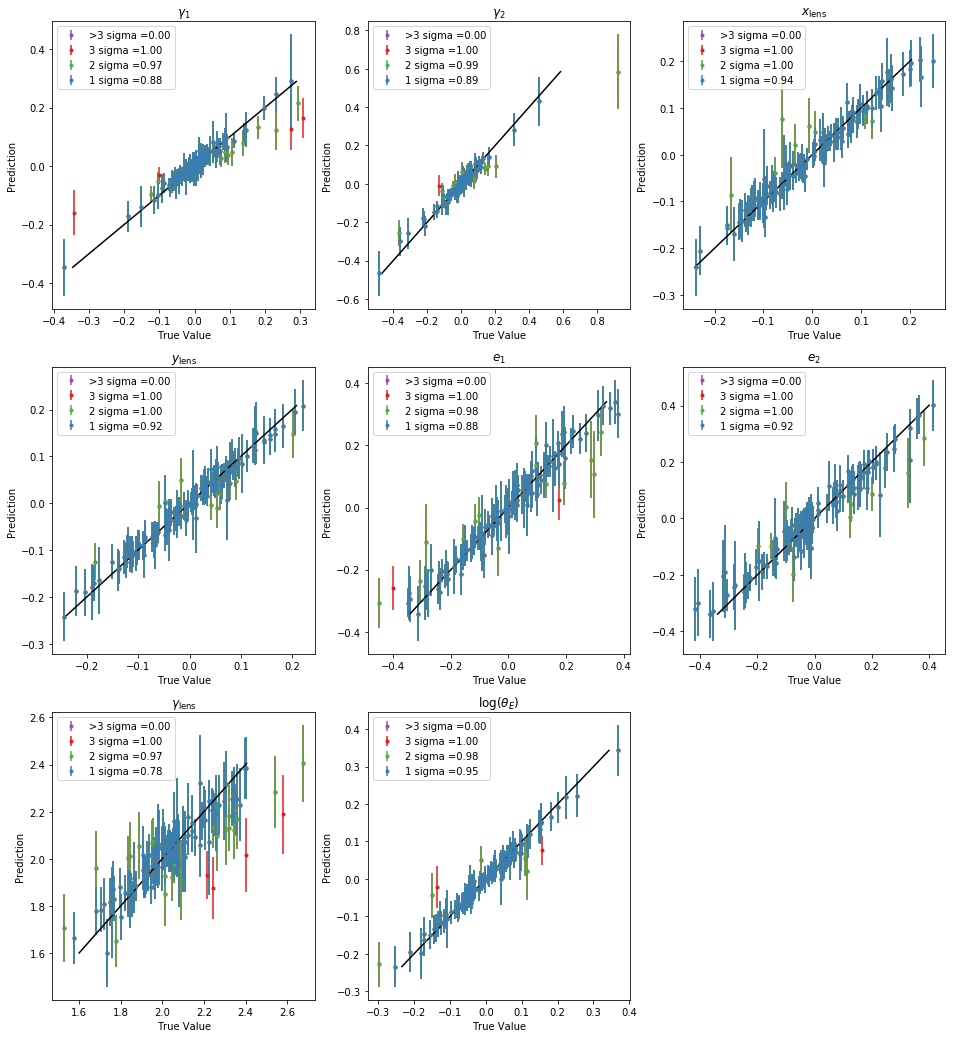

In [16]:
bnn_infer.gen_coverage_plots()

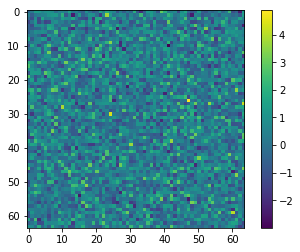

external_shear_g1 0.044992357
external_shear_g2 0.017476238
lens_mass_center_x -0.09910174
lens_mass_center_y 0.006457516
lens_mass_e1 0.29681104
lens_mass_e2 0.22753355
lens_mass_gamma 2.2245455
lens_mass_theta_E_log 0.115011476


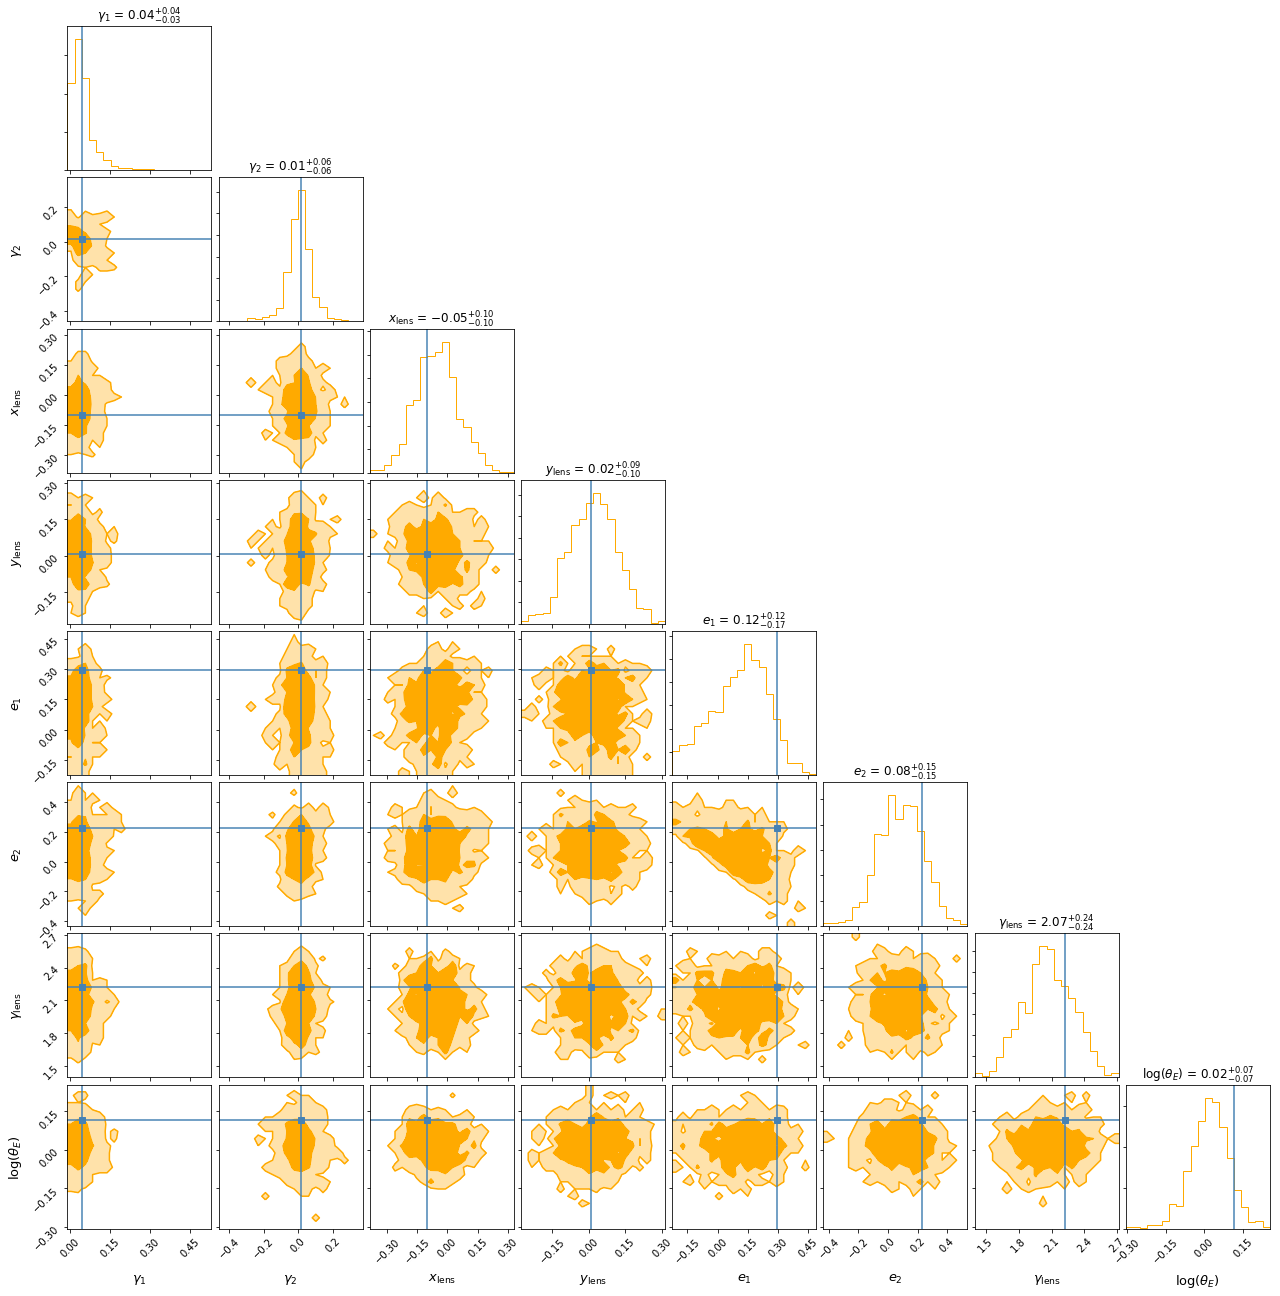

In [22]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

2.1542403171719668e-05 0.010219214823740302


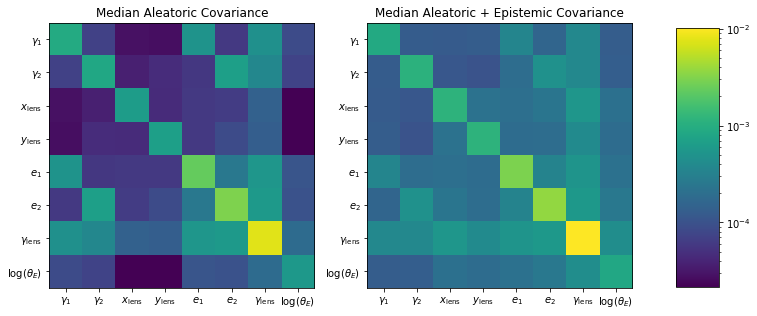

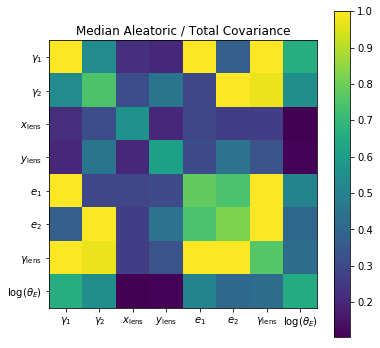

In [18]:
bnn_infer.comp_al_ep_unc()

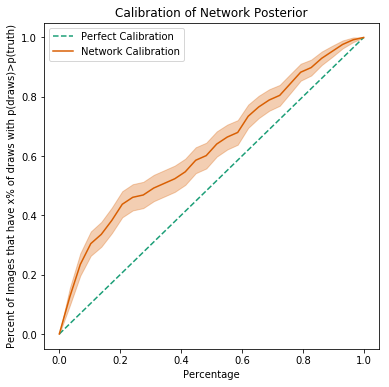

In [19]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Combined Plot

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn1_val_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn2_val_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn3_val_samps/


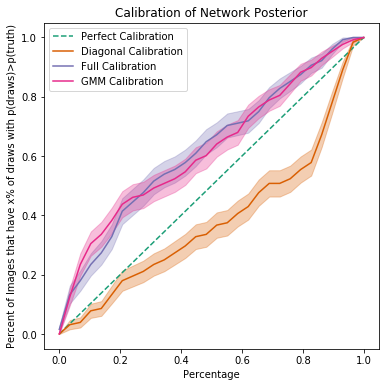

In [20]:
# First specify the config path
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples,save_path_nn1)

color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Diagonal Calibration','Full Calibration',
                                       'GMM Calibration'])